In [1]:
pip install dabl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 558 kB 5.0 MB/s 


In [3]:
import pandas as pd
import dabl
titanic = pd.read_csv(dabl.datasets.data_path("titanic.csv"))

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [4]:
titanic.shape


(1309, 14)

In [5]:
titanic.head() 


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [6]:
titanic_clean = dabl.clean(titanic, verbose=0)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [7]:
types = dabl.detect_types(titanic_clean)
print(types)

                      continuous  dirty_float  low_card_int  categorical  \
pclass                     False        False         False         True   
survived                   False        False         False         True   
name                       False        False         False        False   
sex                        False        False         False         True   
sibsp                      False        False          True        False   
parch                      False        False          True        False   
ticket                     False        False         False        False   
cabin                      False        False         False        False   
embarked                   False        False         False         True   
boat                       False        False         False         True   
home.dest                  False        False         False        False   
age_?                      False        False         False         True   
age_dabl_con

/usr/local/lib/python3.7/dist-packages/dabl/plot/supervised.py:548: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

Target looks like classification
Linear Discriminant Analysis training set score: 0.578


[[<Figure size 1080x1080 with 30 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 432x288 with 1 Axes>],
 None]

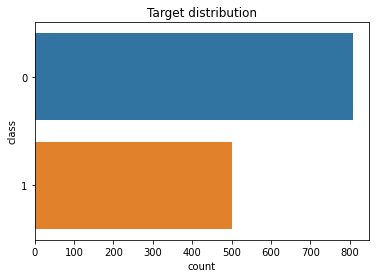

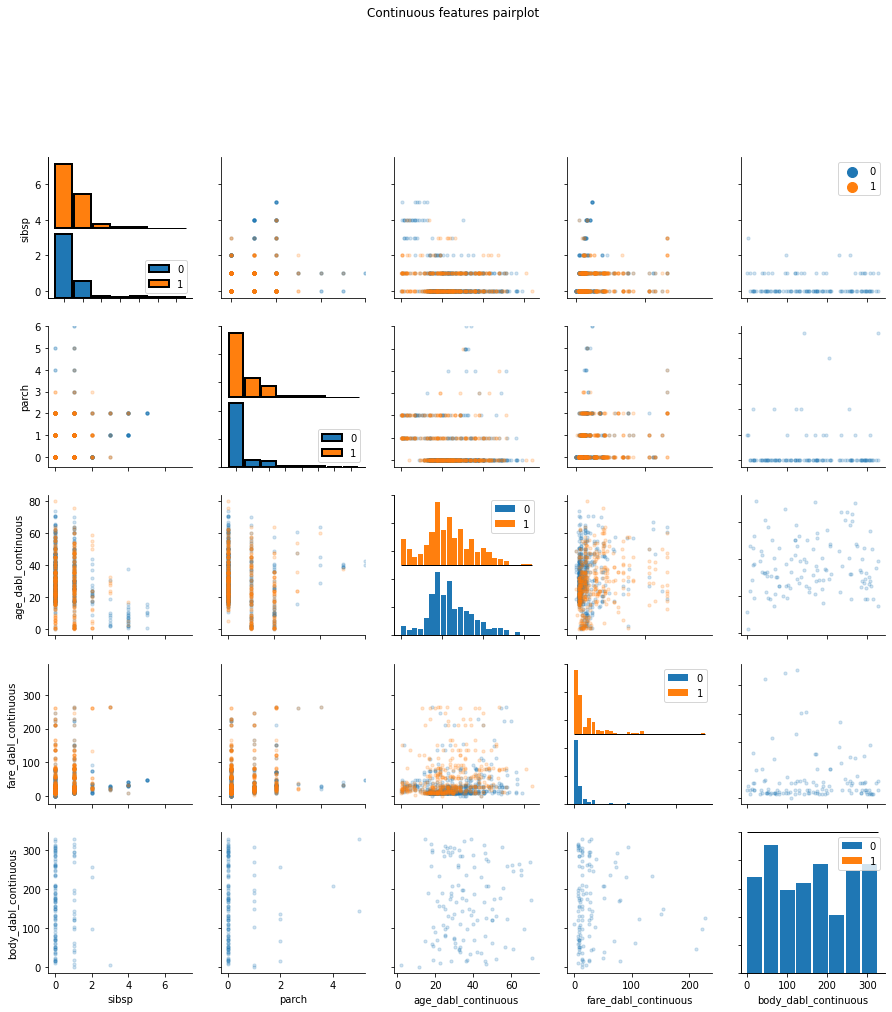

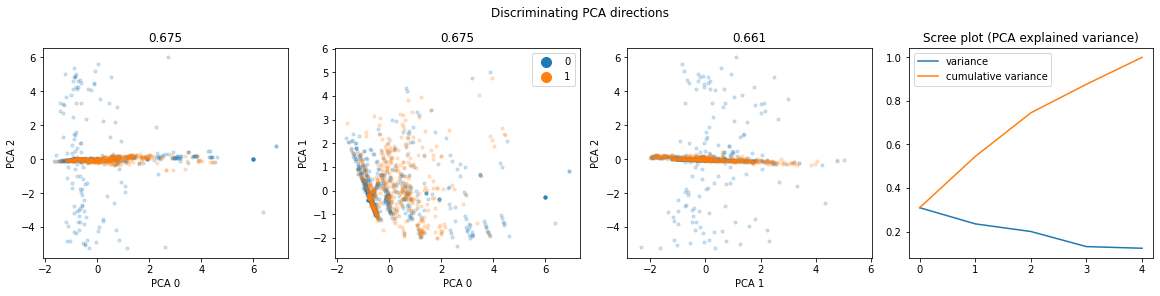

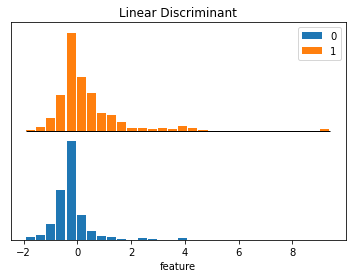

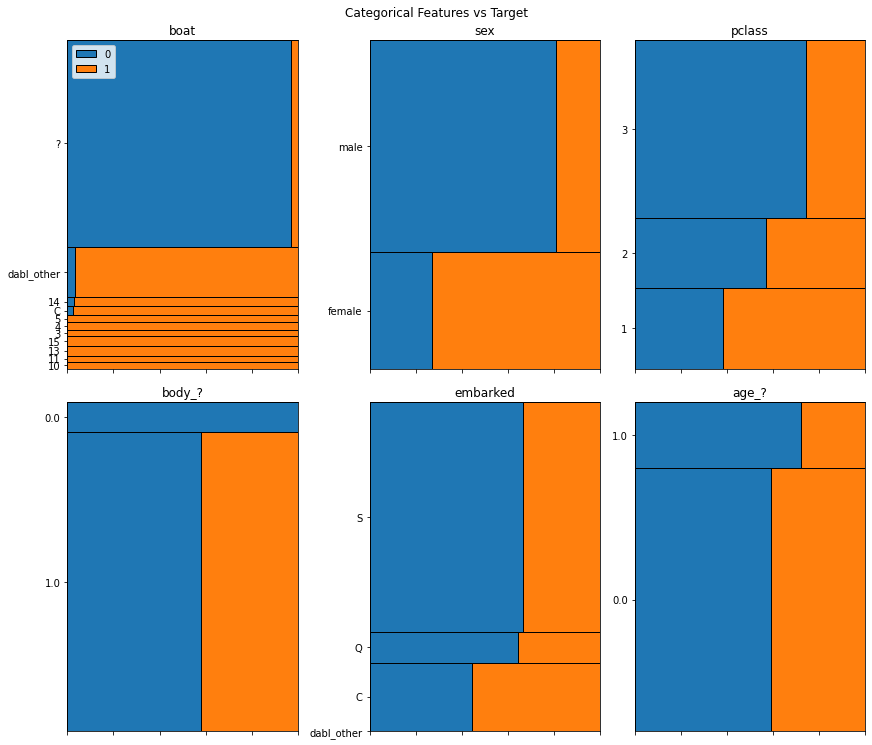

In [8]:
dabl.plot(titanic, 'survived')

In [9]:
fc = dabl.SimpleClassifier(random_state=0)
X = titanic_clean.drop("survived", axis=1)
y = titanic_clean.survived
fc.fit(X, y) 

Running DummyClassifier()
accuracy: 0.618 average_precision: 0.382 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.382
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.618 average_precision: 0.382 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.382

Running GaussianNB()
accuracy: 0.970 average_precision: 0.975 roc_auc: 0.984 recall_macro: 0.964 f1_macro: 0.968
=== new best GaussianNB() (using recall_macro):
accuracy: 0.970 average_precision: 0.975 roc_auc: 0.984 recall_macro: 0.964 f1_macro: 0.968

Running MultinomialNB()
accuracy: 0.964 average_precision: 0.988 roc_auc: 0.990 recall_macro: 0.956 f1_macro: 0.961
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.976 average_precision: 0.954 roc_auc: 0.971 recall_macro: 0.971 f1_macro: 0.974
=== new best DecisionTreeClassifier(class_weight='balanced', max_depth=1) (using recall_macro):
accuracy: 0.976 average_precision: 0.954 roc_auc: 0.971 recall_macro: 0.971 f1_macro: 0.974

Running Decision

SimpleClassifier(random_state=0)